In [7]:
import matplotlib.pyplot as plt
import numpy as np
import qutip
from qutip import Bloch, QobjEvo, basis, sesolve, sigmay, sigmaz, sigmax

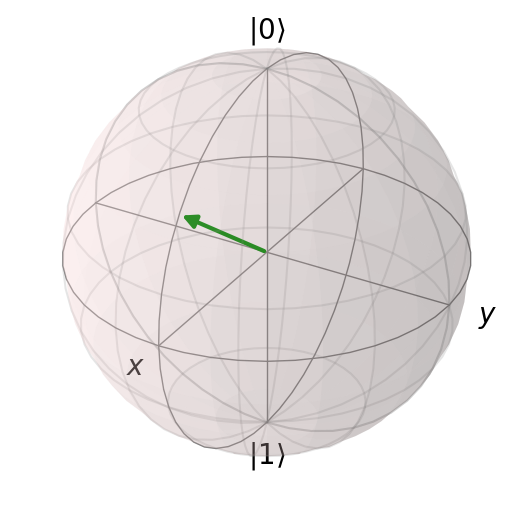

In [8]:
# definig the wave function
psi = (2.0*basis(2,0) + basis(2,1)).unit() # unit normalize your wavefunction
b = Bloch()
b.add_states(psi)
b.show()

In [9]:
# simulate the unitary dynamics
H = sigmaz()
times = np.linspace(0, 10, 100)
result = sesolve(H, psi, times, [sigmay(), sigmax()])  # hamiltonian, quantum system, time, expectation value

<function matplotlib.pyplot.show(close=None, block=None)>

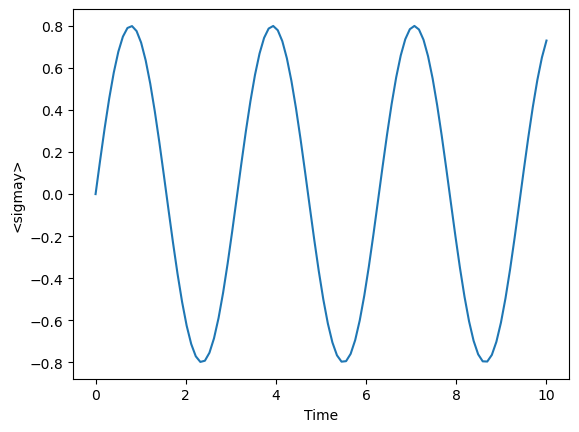

In [12]:
plt.plot(times, result.expect[0])
plt.xlabel("Time"), plt.ylabel("<sigmay>")
plt.show

Above we gave sigmay() as an operator to sesolve to directly calculate it's expectation value. If we pass an empty list at this argument to sesolve it will return the quantum state of the system for each time step in times. We can access the states by result.states and use them for example to plot the states on the Bloch sphere to see the precession. If the solver take a long time to run, it is also a good idea to return the states, so you can calculate different things, without specifying before the calculation.

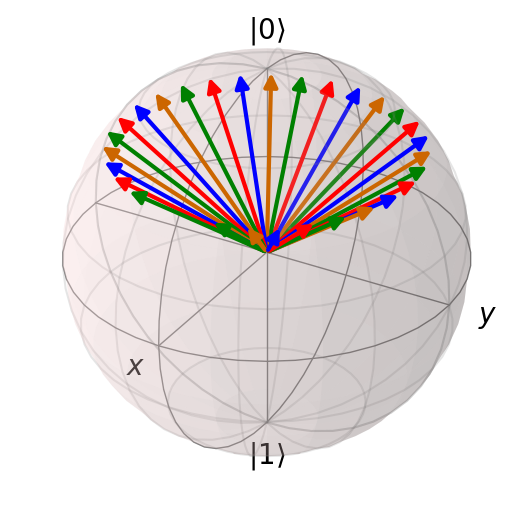

In [14]:
res = sesolve(H, psi, times, [])
b=Bloch()
b.add_states(res.states[1:30])
b.show()

### Simulation with varying magnetic field

Above we passed a constant Hamiltonian to sesolve. In QuTiP these constant operators are represented by Qobj. However, sesolve can also take time-dependent operators as an argument, which are represented by QobjEvo in QuTiP. In this section we define the magnetic field with a linear and a periodic field strength, and observe the changes in the expecation value of σy.

We start by defining two functions for the field strength of the magnetic field. To be passed on to QobjEvo the functions need two arguments: the times and optional arguments.

In [21]:
def linear(t, args):
    return 0.3*t

def periodic(t, args):
    return np.cos(0.5*t)

#define QobjEvos
H_lin = QobjEvo([[sigmaz(), linear]], tlist=times)
H_per = QobjEvo([[sigmaz(), periodic]], tlist=times)

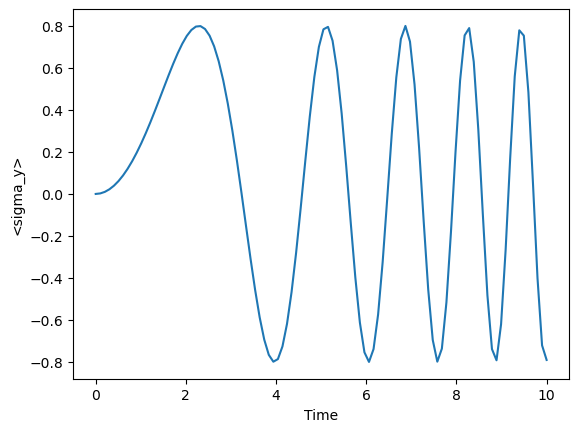

In [22]:
result_lin = sesolve(H_lin, psi, times, [sigmay()])
result_lin_state = sesolve(H_lin, psi, times, [])

# Plot <sigma_y> for linear increasing field strength
plt.plot(times, result_lin.expect[0])
plt.xlabel("Time"), plt.ylabel("<sigma_y>")
plt.show()

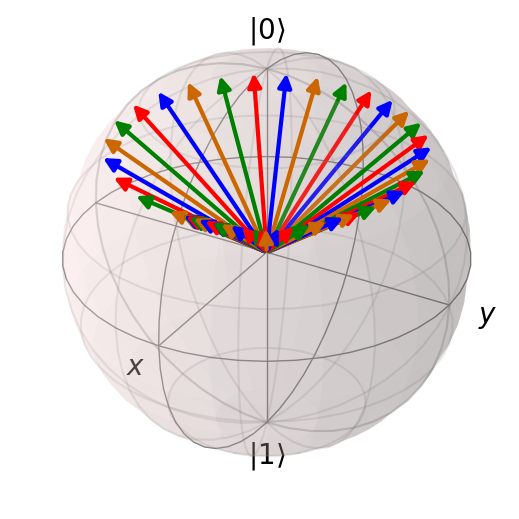

In [36]:
b = Bloch()
b.add_states(result_lin_state.states[0:50])
result_per = sesolve(H_per, psi, times, [sigmay()])
b.show()

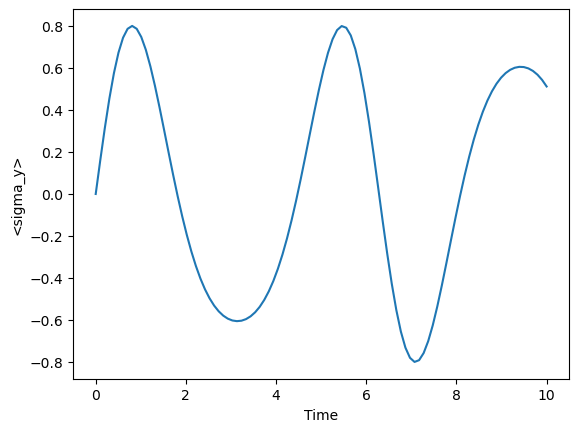

In [35]:
result_per = sesolve(H_per, psi, times, [sigmay()])
result_per_state = sesolve(H_per, psi, times, [])

# Plot <sigma_y> for linear increasing field strength
plt.plot(times, result_per.expect[0])
plt.xlabel("Time"), plt.ylabel("<sigma_y>")
plt.show()

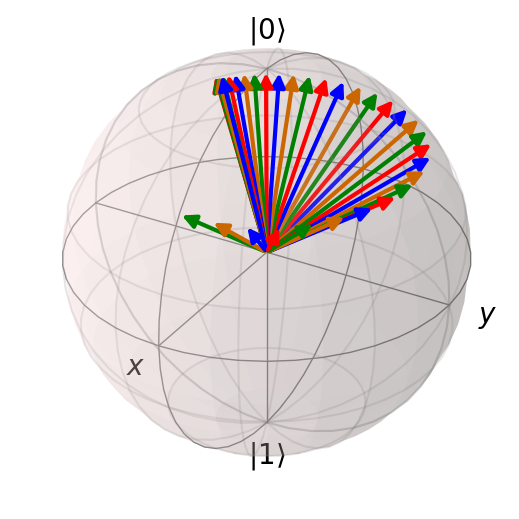

In [46]:
b = Bloch()
b.add_states(result_per_state.states[0:35])
result_per = sesolve(H_per, psi, times, [sigmay()])
b.show()